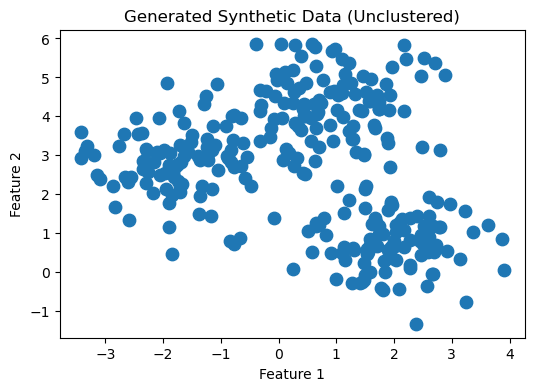

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# --- Data Generation ---

""" 1. Generating the Synthetic Dataset
The sklearn.datasets.make_blobs function is used to create a 2-dimensional dataset with three distinct centers. 
This ensures the data is suitable for easy visualization."""

def generate_cluster_data():
    """Generates a 2D synthetic dataset with 3 well-separated clusters."""
    # We set random_state for reproducibility
    X, y_true = make_blobs(n_samples=300, centers=3,
                           cluster_std=0.80, random_state=0)
    return X

# Generate the data
X = generate_cluster_data()

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=80)
plt.title("Generated Synthetic Data (Unclustered)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

K-Means converged after 8 iterations.


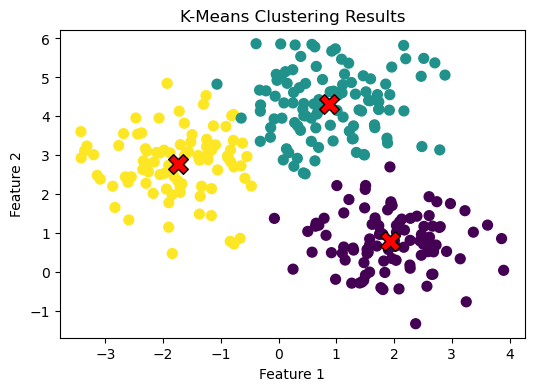

In [ ]:
""" 2.Python Implementation of the K-Means Algorithm From Scratch (Text)
    This code block provides a complete, from-scratch implementation of the K-Means clustering algorithm using only numpy.
"""

import numpy as np

class KMeansFromScratch:
    """K-Means Clustering Algorithm implemented from scratch."""

    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        
    def initialize_centroids(self, X):
        """Randomly selects k data points as initial centroids."""
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[indices]

    def assign_clusters(self, X):
        """Assigns each data point to the nearest centroid."""
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        self.labels = np.argmin(distances, axis=0)

    def update_centroids(self, X):
        """Recalculates centroids based on the mean of the assigned points."""
        new_centroids = np.array([X[self.labels == k].mean(axis=0)
                                  for k in range(self.n_clusters)])
        # Check for convergence (if centroids stop changing significantly)
        convergence = np.allclose(self.centroids, new_centroids, atol=1e-4)
        self.centroids = new_centroids
        return convergence

    def fit(self, X):
        """Runs the K-Means algorithm."""
        self.initialize_centroids(X)

        for i in range(self.max_iter):
            self.assign_clusters(X)
            if self.update_centroids(X):
                print(f"K-Means converged after {i+1} iterations.")
                break
        else:
            print("K-Means finished all iterations without full convergence.")
        return self.labels, self.centroids

# --- How to use the implementation ---

data = generate_cluster_data() # Use the generated data X
kmeans = KMeansFromScratch(n_clusters=3)
cluster_assignments, final_centroids = kmeans.fit(data)

plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, s=50, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=200, marker='X', edgecolors='black')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()